In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

## Data

In [15]:
multi = pd.read_csv('single_multi_regression.csv').iloc[:, :7]
single = pd.read_csv('single_regression.csv')

properties = single.columns

## Visualization

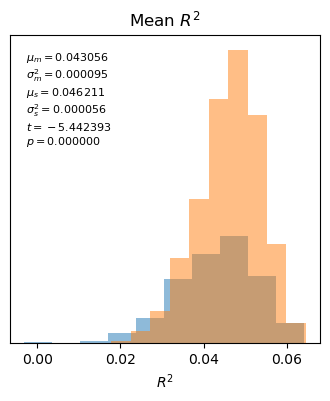

In [18]:
fig, ax = plt.subplots(figsize=(4, 4))

m, s = multi.mean(axis=1), single.mean(axis=1)
tstat, pval = ttest_ind(m, s, equal_var=False)

ax.hist(m, alpha=0.5, label='Multi')
ax.hist(s, alpha=0.5, label='Single')
ax.set_xlabel(r'$R^2$')
ax.set_yticks([])
ax.set_title('Mean $R^2$')
#ax.legend()

txt = f"$\mu_m = {m.mean():2f}$ \n"
txt += f"$\sigma_m^2 = {m.var():2f}$ \n"
txt += f"$\mu_s = {s.mean():2f}$ \n"
txt += f"$\sigma_s^2 = {s.var():2f}$ \n"
txt += f"$t = {tstat:2f}$ \n"
txt += f"$p = {pval:2f}$"
ax.text(0.05, 0.95, txt, transform=ax.transAxes , fontsize=8, va='top');

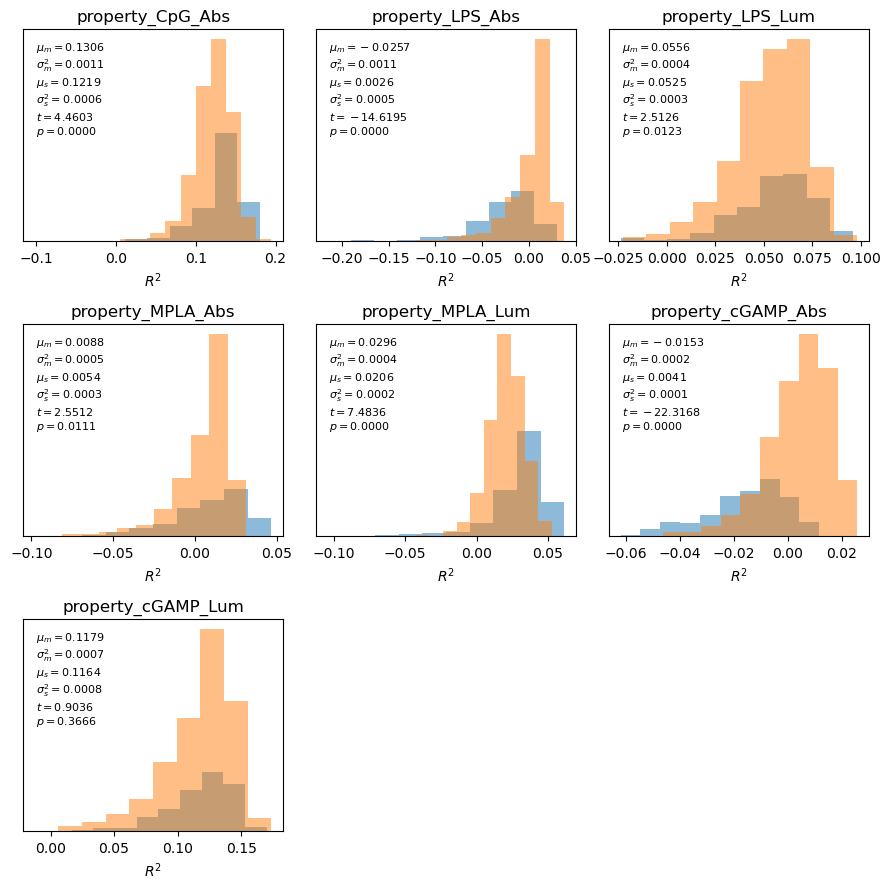

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
axs = axs.flatten()

for i, property_label in enumerate(properties):

    ax = axs[i]

    m, s = multi.iloc[:, i], single.iloc[:, i]
    tstat, pval = ttest_ind(m, s, equal_var=False)

    ax.hist(m, alpha=0.5, label='Multi')
    ax.hist(s, alpha=0.5, label='Single')
    ax.set_xlabel(r'$R^2$')
    ax.set_yticks([])
    ax.set_title(property_label)
    #ax.legend()

    txt = f"$\mu_m = {m.mean():.4f}$ \n"
    txt += f"$\sigma_m^2 = {m.var():.4f}$ \n"
    txt += f"$\mu_s = {s.mean():.4f}$ \n"
    txt += f"$\sigma_s^2 = {s.var():.4f}$ \n"
    txt += f"$t = {tstat:.4f}$ \n"
    txt += f"$p = {pval:.4f}$"
    ax.text(0.05, 0.95, txt, transform=ax.transAxes , fontsize=8, va='top')

axs[-1].axis('off')
axs[-2].axis('off')

plt.tight_layout()